# IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# LOAD DATASET

In [4]:
file_path = r"D:/breast+cancer/breast-cancer.data"

column_names = [
    "Class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps",
    "deg-malig", "breast", "breast-quad", "irradiat"
]

df = pd.read_csv(file_path, header=None, names=column_names)

print("Dataset Loaded Successfully!")
df.head()

Dataset Loaded Successfully!


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


# Check Dataset Information

In [6]:
# ---------------------------------------
# Basic Dataset Information
# ---------------------------------------
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB
None
Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


# Visulaization

C:\Users\User\AppData\Local\Temp\ipykernel_19936\3408705032.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Class", palette="Set2")


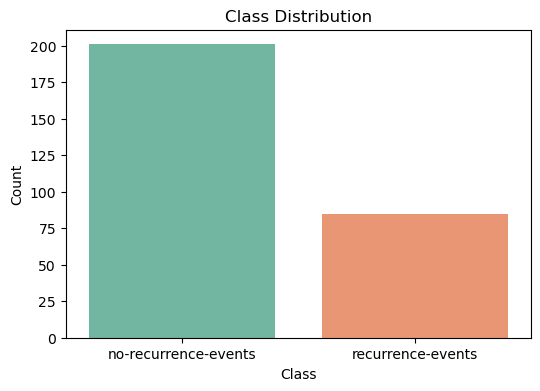

In [8]:
# ----------------------------------------
# 1. Class Distribution
# ----------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Class", palette="Set2")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19936\2985730256.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="age", order=df["age"].value_counts().index, palette="coolwarm")


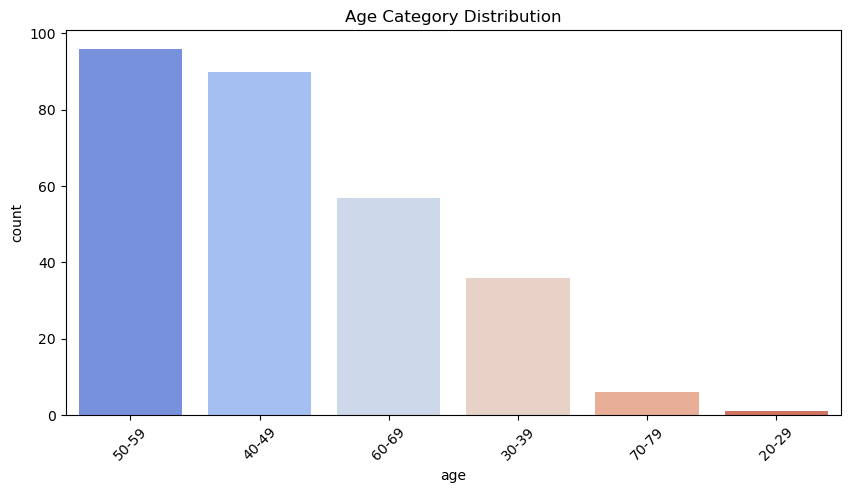

In [9]:
# ----------------------------------------
# 2. Age Category Distribution
# ----------------------------------------
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="age", order=df["age"].value_counts().index, palette="coolwarm")
plt.title("Age Category Distribution")
plt.xticks(rotation=45)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19936\1082363868.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="tumor-size", order=df["tumor-size"].value_counts().index, palette="viridis")


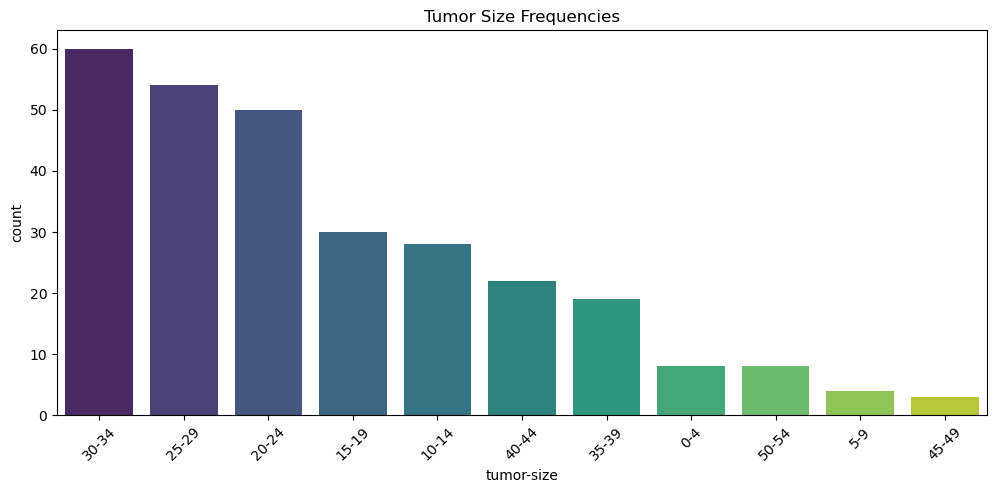

In [10]:
# ----------------------------------------
# 3. Tumor Size Distribution
# ----------------------------------------
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="tumor-size", order=df["tumor-size"].value_counts().index, palette="viridis")
plt.title("Tumor Size Frequencies")
plt.xticks(rotation=45)
plt.show()

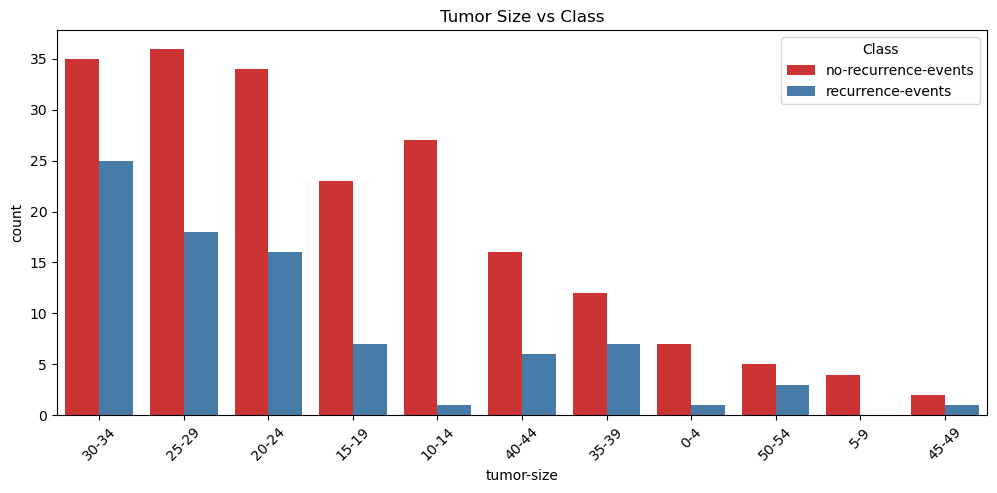

In [11]:
# ----------------------------------------
# 4. Tumor Size vs Class
# ----------------------------------------
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="tumor-size", hue="Class", palette="Set1",
              order=df["tumor-size"].value_counts().index)
plt.title("Tumor Size vs Class")
plt.xticks(rotation=45)
plt.show()

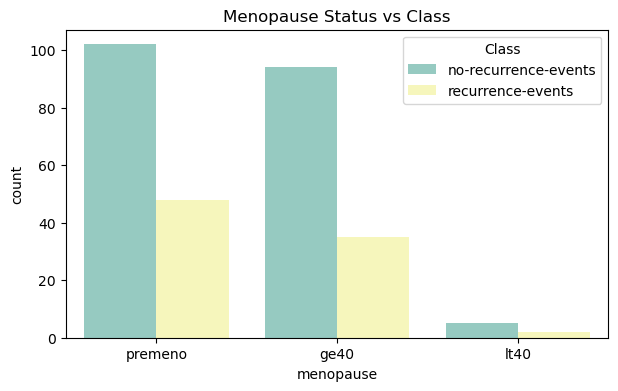

In [12]:
# Menopause Status vs Class
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="menopause", hue="Class", palette="Set3")
plt.title("Menopause Status vs Class")
plt.show()

# Split Features and Target

In [14]:
X = df.drop("Class", axis=1)
y = df["Class"]

# Train-Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing (One-Hot Encoding for Categorical Features)

In [18]:
categorical_features = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Define Models

In [20]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Support Vector Machine": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42)
}

# Train, Predict & Evaluate All Models


Model: Logistic Regression
Accuracy: 0.7414
Classification Report:
                       precision    recall  f1-score   support

no-recurrence-events       0.78      0.88      0.83        41
   recurrence-events       0.58      0.41      0.48        17

            accuracy                           0.74        58
           macro avg       0.68      0.64      0.66        58
        weighted avg       0.72      0.74      0.73        58



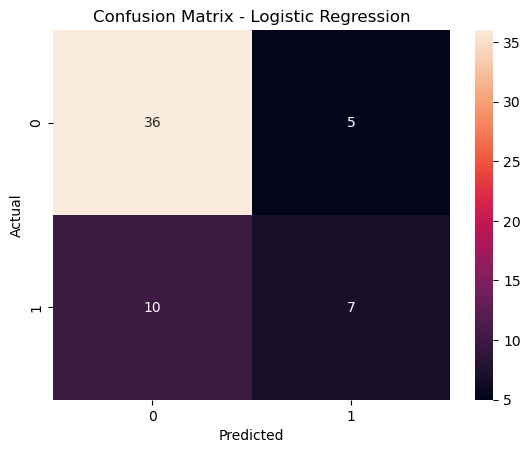


Model: Support Vector Machine
Accuracy: 0.7586
Classification Report:
                       precision    recall  f1-score   support

no-recurrence-events       0.76      0.95      0.85        41
   recurrence-events       0.71      0.29      0.42        17

            accuracy                           0.76        58
           macro avg       0.74      0.62      0.63        58
        weighted avg       0.75      0.76      0.72        58



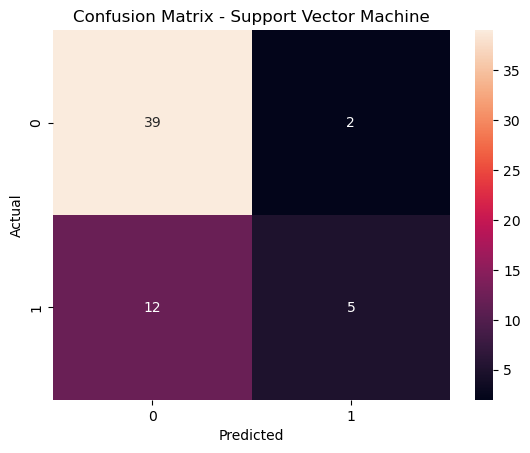


Model: Decision Tree
Accuracy: 0.6034
Classification Report:
                       precision    recall  f1-score   support

no-recurrence-events       0.69      0.80      0.74        41
   recurrence-events       0.20      0.12      0.15        17

            accuracy                           0.60        58
           macro avg       0.44      0.46      0.44        58
        weighted avg       0.54      0.60      0.57        58



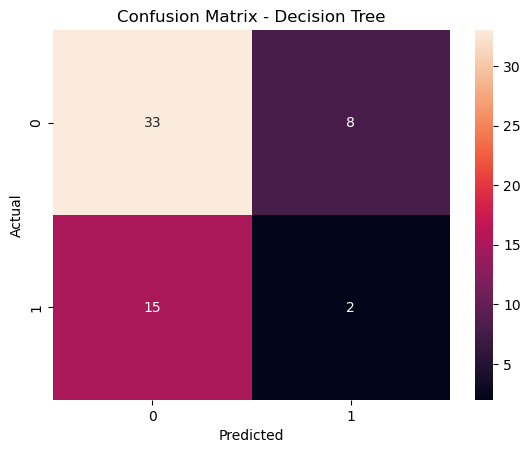

In [22]:
results = {}

for model_name, model in models.items():
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("classifier", model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[model_name] = acc

    print("\n=================================")
    print(f"Model: {model_name}")
    print("Accuracy:", round(acc, 4))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# Display Summary of All Model Accuracies

In [24]:
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print(results_df)

                    Model  Accuracy
0     Logistic Regression  0.741379
1  Support Vector Machine  0.758621
2           Decision Tree  0.603448
